<h3>Objective</h3>
<h4>Identify the features which have high impact on attrition</h4>

Import the modules needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

Download the dataset and read it into a dataframe

In [2]:
data = pd.read_csv(r'dvi-a2-ps8-data.csv')

First five items in the dataset.

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,...,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Female,...,5993,8,Yes,11,Excellent,80,8,6,4,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,Male,...,5130,1,No,23,Outstanding,80,10,10,7,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,...,2090,6,Yes,15,Excellent,80,7,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Female,...,2909,1,Yes,11,Excellent,80,8,8,7,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Male,...,3468,9,No,12,Excellent,80,6,2,2,2


Find out how many entries there are in the dataset.

In [4]:
df = data
print(f"Number of rows: {df.shape[0]}\nNumber of columns:{df.shape[1]}")

Number of rows: 1470
Number of columns:23


# Clean up data. <br>
Remove unnecessary columns. Mention the reasons.<br>
Show the data.

In [5]:
print('\nColumns with missing value:')
print(df.isnull().any())


Columns with missing value:
Age                     False
Attrition               False
BusinessTravel          False
DailyRate               False
Department              False
DistanceFromHome        False
Education               False
EducationField          False
EmployeeNumber          False
Gender                  False
JobRole                 False
JobSatisfaction         False
MaritalStatus           False
MonthlyIncome           False
NumCompaniesWorked      False
OverTime                False
PercentSalaryHike       False
PerformanceRating       False
StandardHours           False
TotalWorkingYears       False
YearsAtCompany          False
YearsInCurrentRole      False
YearsWithCurrManager    False
dtype: bool


# **Columns to be removed:**

**EmployeeNumber:** This column represents a unique identifier for each employee. While it can be useful for individual identification and tracking, it typically doesn't provide any meaningful insights or contribute to analyses such as understanding factors influencing attrition, job satisfaction, or performance. Therefore, unless there's a specific need for individual identification, this column can be considered unnecessary for general analyses.

**StandardHours:**  This column represents the standard number of working hours for each employee. In most organizations, the standard working hours are uniform for all employees and are unlikely to vary significantly within the dataset. Therefore, including this column doesn't provide much variation or useful information for analysis. It's assumed that all employees adhere to the same standard working hours. Hence, it can be considered unnecessary for the analysis at hand.

In [6]:
unnecessary_columns = ['EmployeeNumber', 'StandardHours']  # Columns to be removed
df_cleaned = df.drop(columns=unnecessary_columns)

# Convert 'Attrition' into a numerical format for correlation analysis
df_cleaned['Attrition'] = df_cleaned['Attrition'].apply(lambda x:1 if x=='Yes' else 0)

In [7]:
df_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,Female,Sales Executive,...,Single,5993,8,Yes,11,Excellent,8,6,4,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,Male,Research Scientist,...,Married,5130,1,No,23,Outstanding,10,10,7,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,Male,Laboratory Technician,...,Single,2090,6,Yes,15,Excellent,7,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Female,Research Scientist,...,Married,2909,1,Yes,11,Excellent,8,8,7,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,Male,Laboratory Technician,...,Married,3468,9,No,12,Excellent,6,2,2,2


# Question 1
<h4>Find the correlation between all numerical features.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
    <h4>Answer in markdown cells below the visual <br><br>
        1.Summarise your findings from the visual.<br>
            2.The reason for selecting the chart type you did <br>
                3.Mention the pre-attentive attributes used.(atleast 2)<br>
                    4.Mention the gestalt principles used.(atleast 2)<br>
   

C:\Users\yashw\AppData\Local\Temp\ipykernel_12672\1357618455.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


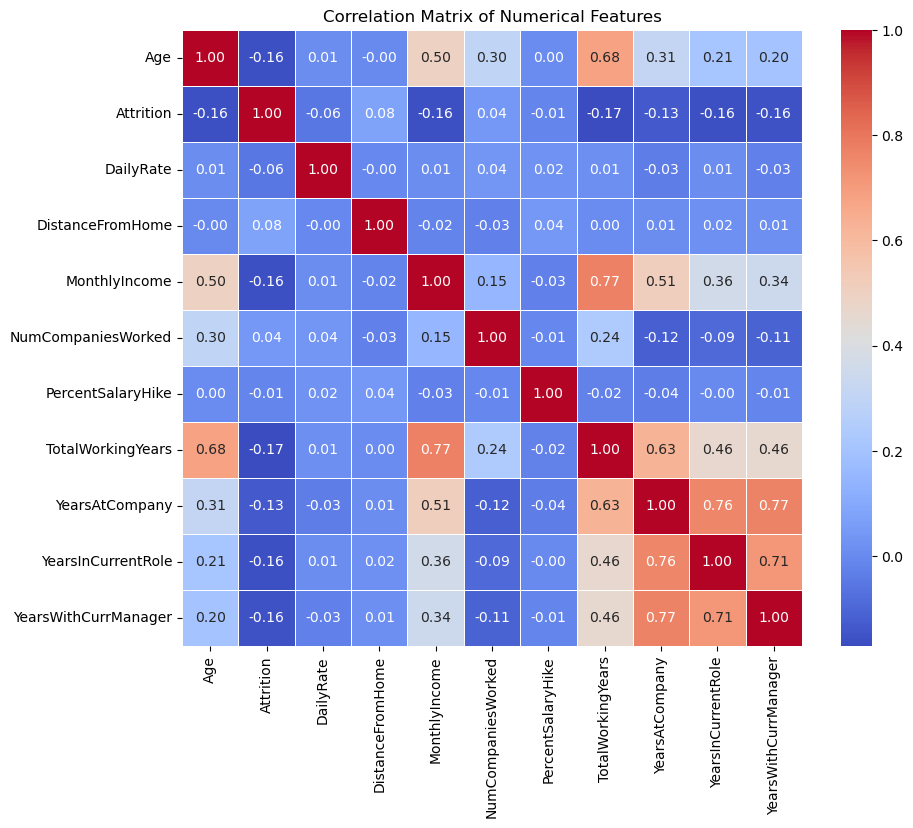

In [8]:
correlation_matrix = df_cleaned.corr()
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Findings:**
- The heatmap visually represents the correlation coefficients between all pairs of numerical features.
- Positive correlations are indicated by warmer colors (closer to red), while negative correlations are indicated by cooler colors (closer to blue).
- The 'Attrition' feature, now numerical, shows varying degrees of correlation with other features, but none are very strong, suggesting no single factor overwhelmingly influences attrition.
-  There is a positive correlation between total working years and monthly income (0.77). This means that people who have worked for more years tend to have higher monthly incomes.
- There is a positive correlation between total working years and years at company (0.63). This means that people who have worked for more years tend to have been with their current company for longer.
- There is a positive correlation between years at company and years in current role (0.76). This means that people who have been with their company for longer tend to have been in their current role for longer.
- There is a negative correlation between monthly income and years with current manager (-0.6). This means that people with higher monthly incomes tend to have fewer years with their current manager.

**Reasons for selecting the heatmap:**
- Ease of Interpretation: Heatmaps provide an intuitive and easy-to-interpret visualization of correlation matrices.
- Comprehensive Representation: Heatmaps allow us to quickly identify patterns of correlation across multiple variables.

**Pre-attentive attributes used:**
- Color: Color variation is used to represent different correlation values, making it easy to perceive the strength and direction of correlation.
- Size/Length: The size of the heatmap cells is uniform, making it easier to compare correlation values across different pairs of features.

**Gestalt principles used:**
- Proximity: Heatmap cells representing correlated variables are placed close to each other, aiding in the perception of patterns and clusters of correlation.
- Similarity: Heatmap cells with similar correlation values are displayed with similar colors, facilitating the comparison of correlation strengths within the matrix.

### Question 2
<h4>Find the distribution of age in the dataset. Identify which age group is most prone to attrition.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


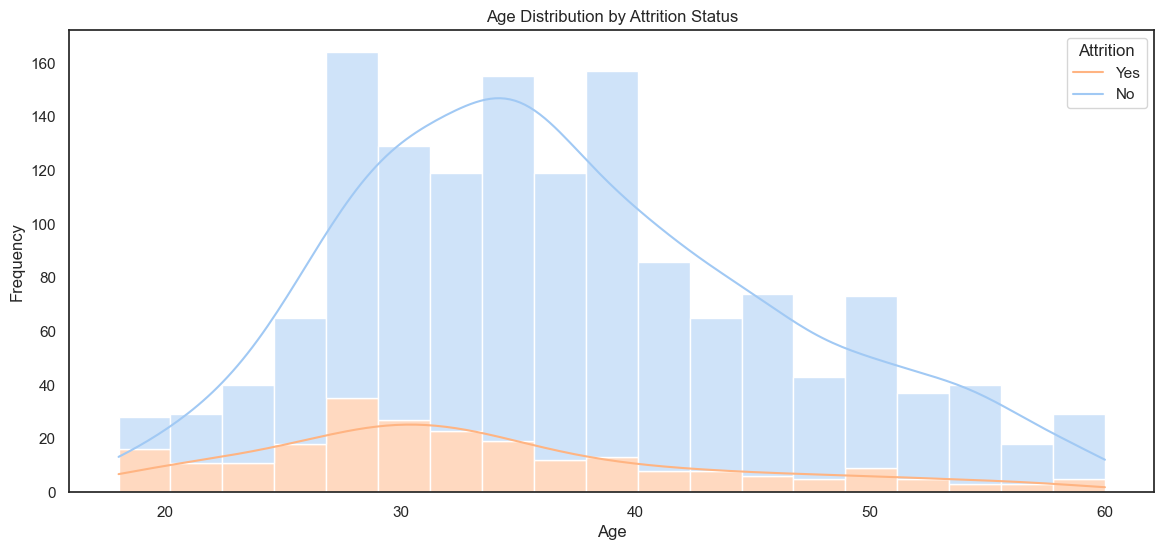

In [56]:
# Creating a visual representation of age distribution with respect to attrition

# Setting the aesthetic style of the plots
sns.set_style("white")

# Plotting the distribution of age for employees with and without attrition
plt.figure(figsize=(14, 6))
sns.histplot(data=df_cleaned, x="Age", hue="Attrition", multiple="stack", kde=True, palette="pastel")
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Attrition', labels=['Yes', 'No'])

plt.show()



**Findings:**
- The histogram shows the distribution of age among employees, segmented by attrition status.
- We can observe the count of employees in each age group who have and have not experienced attrition.
- The distribution is skewed to the left for attrition and skewed to the right for no attrition. This means that there are more younger employees who attrition and more older employees who do not attrition.
- In other words, the younger the employee, the more likely they are to attrite, and the older the employee, the more likely they are to not attrite.

**Reason for selecting the bar plot:**
- The histogram effectively visualizes the distribution of a continuous variable (age) segmented by a categorical variable (attrition status), making it suitable for this analysis.
- It allows for easy comparison of the distribution of age among employees who have and have not experienced attrition.

**Pre-attentive attributes used:**
- Length/Height: The height of each bar represents the count of employees in the corresponding age group, making it easy to compare.
- Color: Different colors are used to distinguish between attrition and non-attrition cases, aiding in visual separation and interpretation.

**Gestalt principles used:**
- Proximity: Bars representing the same age group are placed close to each other, facilitating comparison within each category.
- Similarity: Bars with the same color (attrition status) are perceived as belonging to the same group, aiding in the interpretation of attrition patterns within different age groups.

### Question 3
<h4>Analyse the departmentwise attrition rate.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


<Figure size 1400x600 with 0 Axes>

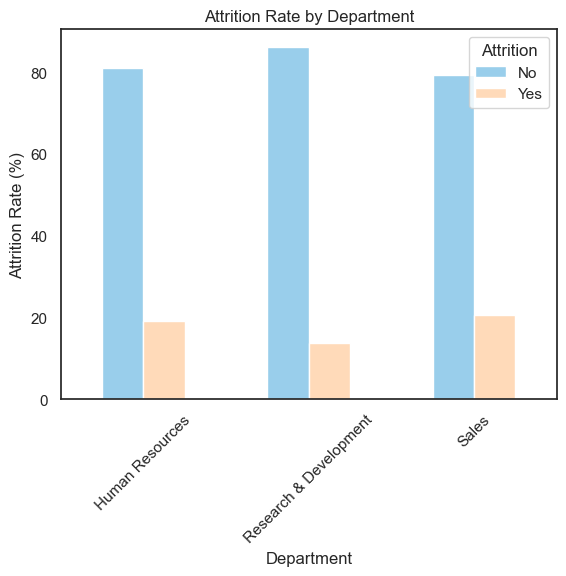

In [32]:
sns.set(style="white")

# Calculating the attrition rate by department
department_attrition = df_cleaned.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100

# Creating a bar chart to visualize the attrition rate by department
plt.figure(figsize=(14, 6))
department_attrition.plot(kind='bar', stacked=False, color=['#99CEEB', '#FFDAB9'])
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(rotation=45)

plt.show()

**Findings:**
- The grouped bar plot shows the attrition counts for each department, segmented by attrition status (Yes or No).
-  The attrition rate is highest in the Sales department, at around 60%.  The attrition rate is much lower in Research and Development (around 22%) and Human Resources (around 18%).
- While the Research & Development and Sales departments have the highest absolute numbers of attrition, viewing the data as a percentage reveals how significant the attrition rate is in relation to the total number of employees in each department.
- The Human Resources department, despite having a lower absolute number of attritions, shows a noteworthy percentage when adjusted for the department's size, indicating that smaller departments can also experience significant attrition impacts.
- This suggests that employees are more likely to leave the company if they work in Sales. It's important to consider that this is just one data point, and there could be other factors that contribute to attrition in different departments

**Reason for selecting the grouped bar plot:**
- The grouped bar plot effectively visualizes the attrition rates across different departments, allowing for easy comparison between attrition and non-attrition cases within each department.
- It's suitable for categorical data and helps in identifying patterns and trends within the dataset.

**Pre-attentive attributes used:**
- Length/Height: The height of each bar represents the count of employees in the corresponding department, making it easy to compare.
- Color: Different colors are used to distinguish between attrition and non-attrition cases, aiding in visual separation and interpretation.

**Gestalt principles used:**
- Similarity: Bars with the same color (attrition status) are perceived as belonging to the same group, facilitating comparison within each category.
- Proximity: Bars representing the same department are placed close to each other, aiding in the perception of patterns and trends within each department.

### Question 4
<h4>Identify the top 5 job roles with highest attrition rate.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


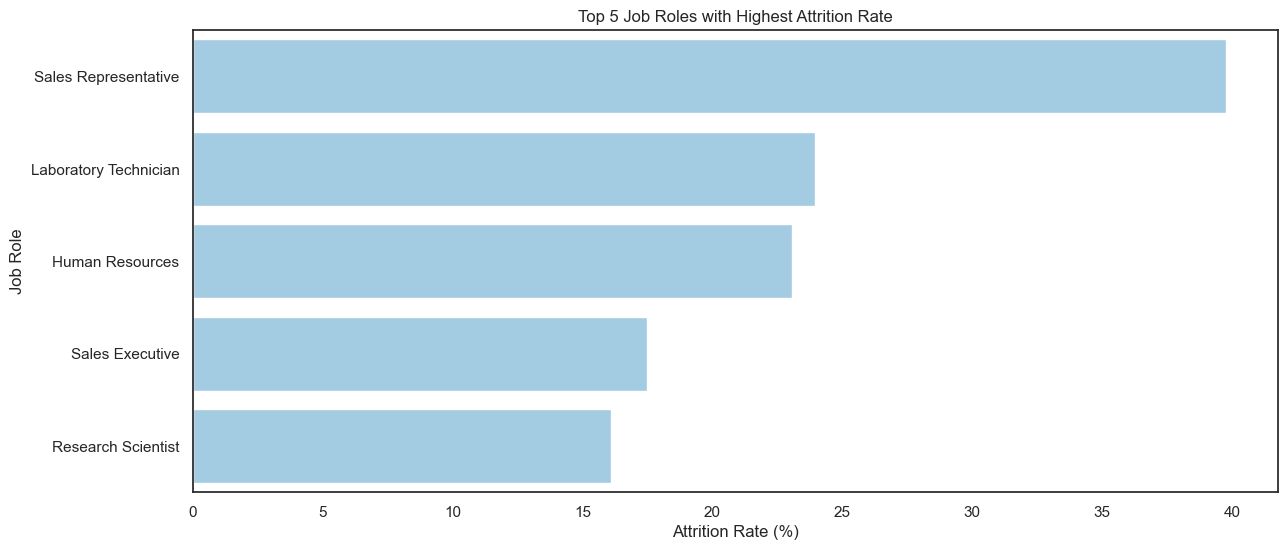

In [35]:
sns.set(style="white")

# Calculate the attrition rate for each job role
job_role_attrition = df_cleaned.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)[1]*100

# Sort by attrition rate and select the top 5
top_5_job_roles = job_role_attrition.sort_values(ascending=False).head(5)

# Generate a bar plot for the top 5 job roles with the highest attrition rate
plt.figure(figsize=(14, 6))
sns.barplot(x=top_5_job_roles.values, y=top_5_job_roles.index, color='#99CEEB')
plt.title('Top 5 Job Roles with Highest Attrition Rate')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Job Role')

plt.show()

**Findings:**
- The bar plot shows the attrition rates for the top 5 job roles with the highest attrition rates.
- We can observe the attrition rates (%) for each job role and identify the top 5 roles with the highest attrition rates.
- By analyzing the plot, we can determine that Sales representative role has highest attrition rates in the company and Research Scientist role has low attrition rate.

**Reason for selecting the bar plot:**
- The bar plot effectively visualizes and compares the attrition rates across different job roles, making it easy to identify the top 5 roles with the highest attrition rates.
- It's suitable for displaying quantitative data (attrition rates) for categorical variables (job roles).

**Pre-attentive attributes used:**
- Length/Height: The height of each bar represents the attrition rate for the corresponding job role, allowing for easy comparison.
- Color: The color of the bars adds visual appeal and helps distinguish between different job roles.

**Gestalt principles used:**
- Similarity: Bars with the same color (representing the same job role) are perceived as belonging to the same group, facilitating comparison within each category.
- Continuity: The bar plot provides a continuous representation of attrition rates across different job roles, aiding in the perception of trends and patterns.

### Question 5
<h3> Multivariate analysis
<h4>Identify the top 2 highly correlated features.Analyse(use a single visual), how they relate to "number of years in the company" and their combined effect on attrition.<br>
    
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  

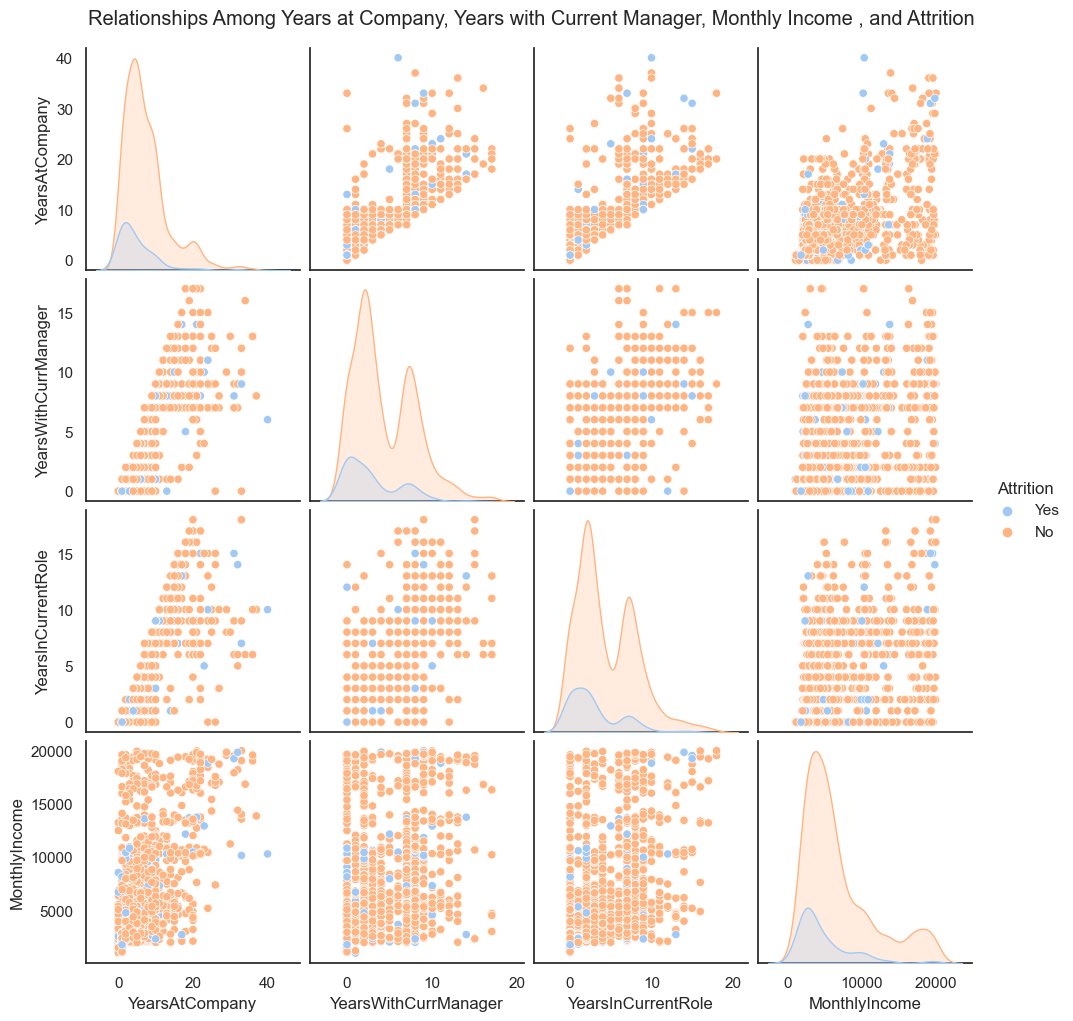

In [38]:
sns.set(style="white")

# Creating a subset for visualization, including the identified features and Attrition
features_for_visualization = ['YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole', 'MonthlyIncome', 'Attrition']
df_subset = df[features_for_visualization]

# Creating the pair plot
sns.pairplot(df_subset, hue='Attrition', vars=['YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole', 'MonthlyIncome'], diag_kind='kde', palette='pastel')
plt.suptitle('Relationships Among Years at Company, Years with Current Manager, Monthly Income , and Attrition', y=1.02)
plt.show()


**Findings:**
- Pair plot provides a comprehensive overview of how each pair of features relates to each other, including the distribution of each feature across different attrition statuses.
- The diagonal plots (kernel density estimates) offer insights into the distribution of values for employees who stayed versus those who left, for each feature.
- Off-diagonal plots show the relationships between pairs of features, colored by attrition status, which helps in identifying patterns or correlations that might not be immediately obvious.
- We can observe more attrition rate in the employees with salary < 15000.


**Reason for selecting the scatter plot matrix:**
- Clusters or trends might emerge in the relationships between "YearsWithCurrManager", "YearsInCurrentRole", "MonthlyIncome", and "YearsAtCompany", differentiated by attrition status. For example, certain ranges of "YearsWithCurrManager" and "MonthlyIncome" might be associated with higher attrition rates, especially when combined with specific "YearsAtCompany" values.

**Pre-attentive attributes used:**
- Color: The color of data points represents attrition status, aiding in the perception of the combined effect of the features on attrition.
- Position/Location: The position of data points on the scatter plot represents the values of the top 2 highly correlated features, allowing for comparison and analysis.

**Gestalt principles used:**
- Proximity: Data points within the same group (attrition status) are close to each other, facilitating comparison and analysis within each category.
- Similarity: Data points with the same color (attrition status) are perceived as belonging to the same group, aiding in the interpretation of the combined effect of the features on attrition.

**Data Question 1:** How does the distribution of monthly income vary across different job roles, and what impact does job role have on this distribution?

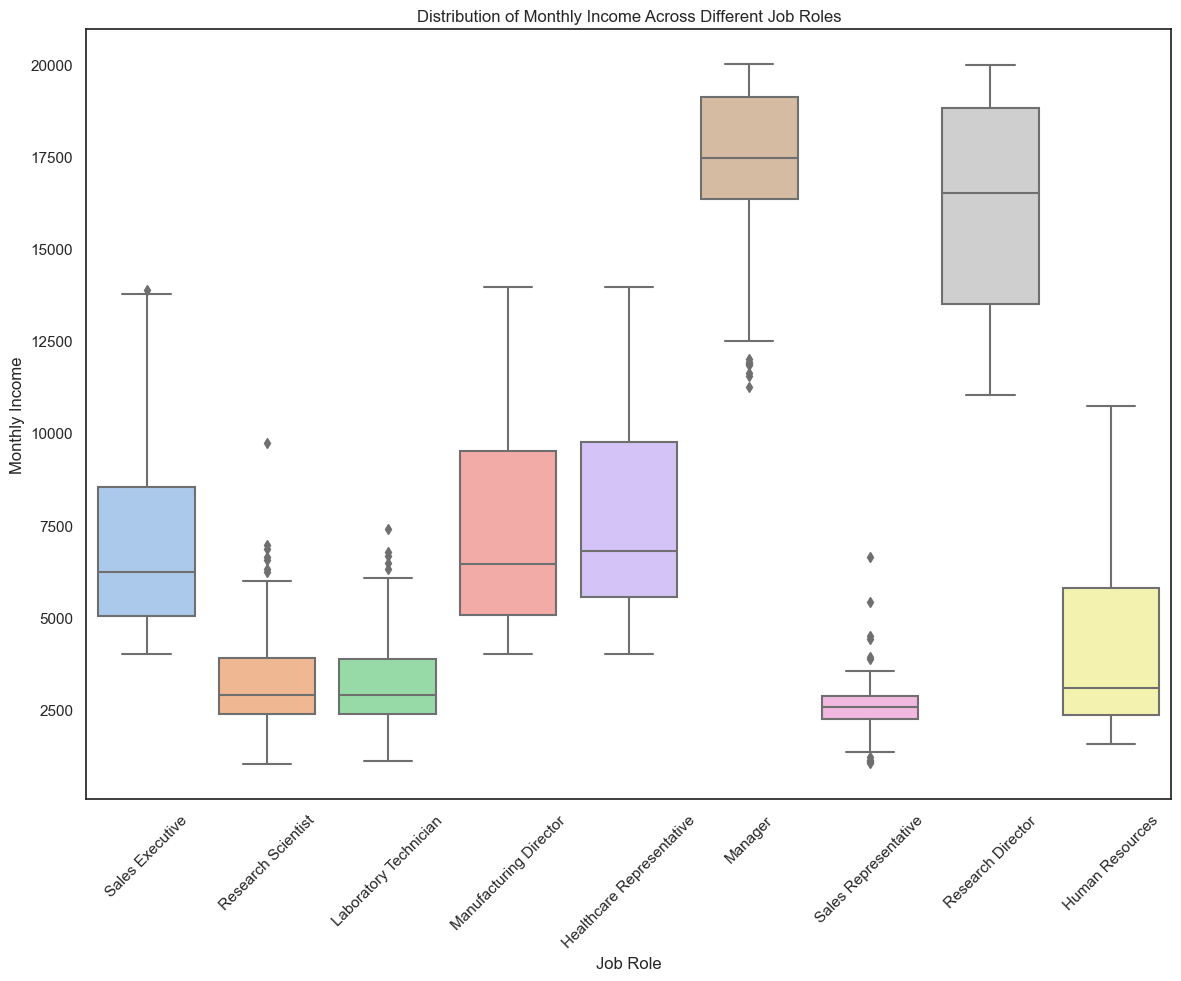

In [40]:
# Creating a boxplot to visualize the distribution of monthly income across different job roles
plt.figure(figsize=(14, 10))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df, palette='pastel')
plt.title('Distribution of Monthly Income Across Different Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()

**Findings:**
- The distribution of monthly income varies significantly across different job roles, indicating that job role is a major factor influencing income levels within the company.
- Certain job roles, such as 'Manager' and 'Research Director,' have notably higher median incomes and a wider range of incomes, reflecting higher responsibilities and possibly longer tenure or higher qualifications required for these positions.
- Roles like 'Sales Representative' and 'Laboratory Technician' show lower median incomes and less variability, suggesting these positions might be entry-level or require fewer qualifications.
- There are outliers in several job roles, indicating employees with exceptionally high incomes for their roles, which could be attributed to exceptional performance, specializations, or seniority.

**Reason for selecting the box plot:**
- The box plot is suitable for visualizing the distribution of a continuous variable (monthly income) across multiple categories (job roles).
- It effectively displays summary statistics such as median, quartiles, and outliers, making it easy to compare distributions across different job roles.

**Pre-attentive attributes used:**
- Length/Height: The length of the boxplot represents the range of monthly income values within each job role, allowing for comparison of income distributions.
- Color: Different colors are used to distinguish between job roles, aiding in visual separation and interpretation.

**Gestalt principles used:**
- Proximity: Boxplots for the same job role are placed close to each other, facilitating comparison of income distributions within each role.
- Similarity: Boxplots with similar attributes (e.g., color, shape) are perceived as belonging to the same group (job role), aiding in the interpretation of income distributions within each category.

**Data Question 2:** What is the distribution of attrition among different Eduacation field, and how does it vary based on other categorical variables such as overtime?

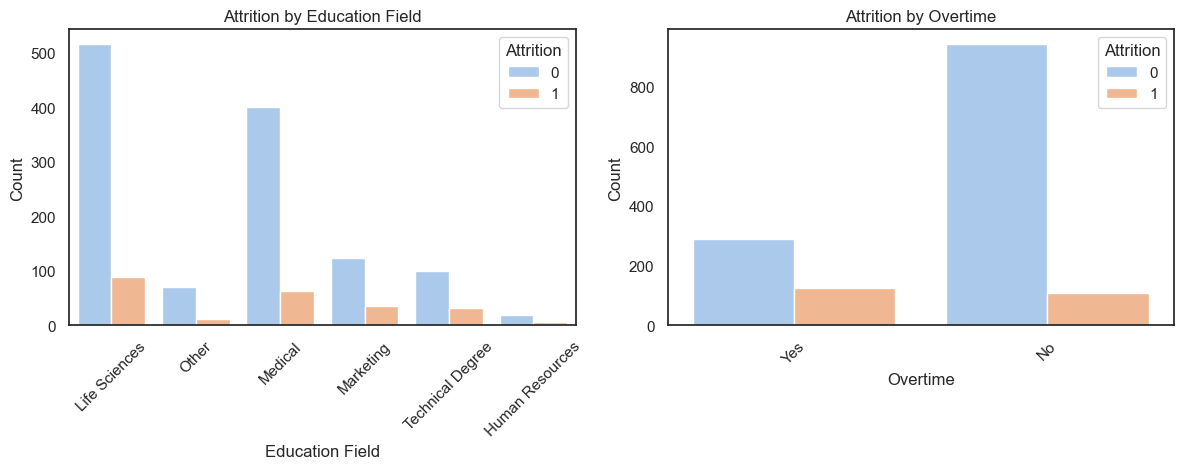

In [55]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(data=df_cleaned, x='EducationField', hue='Attrition',palette='pastel')
plt.title('Attrition by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(data=df_cleaned, x='OverTime', hue='Attrition',palette='pastel')
plt.title('Attrition by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Findings from the Visuals:**
- The distribution of attrition varies across different Education fields, with the Life Sciences department having the highest number of attrition cases.
- Attrition rates also vary based on education field, and overtime.
-Employees who work overtime tend to have higher attrition rates compared to those who do not.

**Reason for Selecting the Chart Type:**
- Bar plots are effective for comparing the frequency of different categories, making it suitable for displaying the distribution of attrition across various categories.
- The countplot also allows for easy comparison of the number of attrition cases within each category, helping to identify patterns and trends.

**Pre-attentive Attributes Used:**
- Color: Different colors are used to represent the two categories in each chart (e.g., 'Yes' and 'No' for attrition), making it easier for viewers to distinguish between them.
- Length/Height: Variations in the height of the bars represent differences in the frequency of attrition cases within each category, drawing attention to areas with higher attrition rates.

**Gestalt Principles Used:**
- Proximity: Bars within each category are grouped closely together, indicating their association with the same category (e.g. attrition rates), facilitating comparison.
- Similarity: Bars representing the same category share similar colors, visually grouping them together and aiding in the comparison of attrition rates within each category.